In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
clust_data = pd.read_csv("clust-data.csv")
clust_data.head()

,x,y
0,3.80286,2.15835
1,5.18384,2.21139
2,3.15722,2.30568
3,5.56977,2.37613
4,4.11252,2.95963


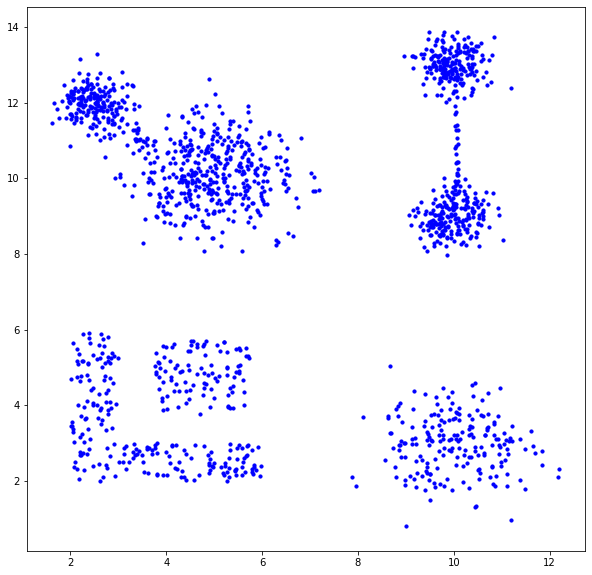

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(clust_data['x'], clust_data['y'], s=10, color="blue")

In [4]:
means = clust_data.mean()
means
clust_data_means = clust_data - means

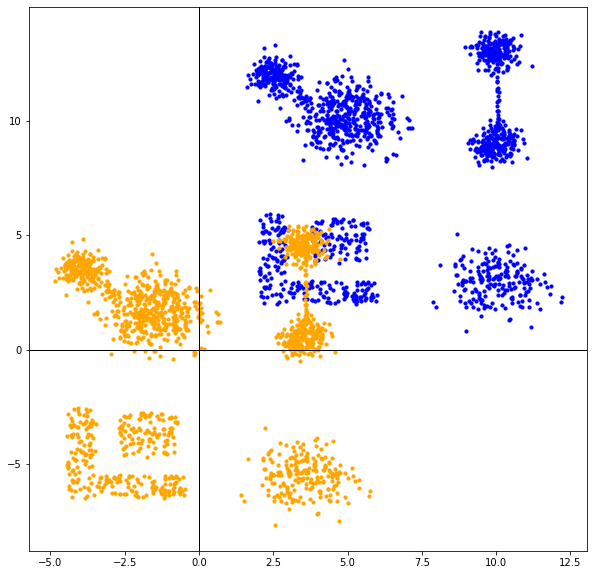

In [5]:
ax.scatter(clust_data_means['x'], clust_data_means['y'], s=10, color='orange')
ax.axvline(0, c='black', lw=1)
ax.axhline(0, c='black', lw=1)
fig

In [6]:
angle = 45
radian = 2*np.pi*angle/360
R = np.array([np.cos(radian), -1*np.sin(radian), np.sin(radian), np.cos(radian)]).reshape(2,2)
R

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [7]:
rotated = (R @ clust_data_means.transpose()).transpose()
rotated

,0,1
0,2.577216,-6.335919
1,3.516212,-5.321913
2,2.016502,-6.688277
3,3.672617,-4.932531
4,2.229588,-5.550365
...,...,...
1540,7.177816,-0.450535
1541,6.136064,-1.443822
1542,5.576212,-0.629496
1543,7.711130,-1.542944


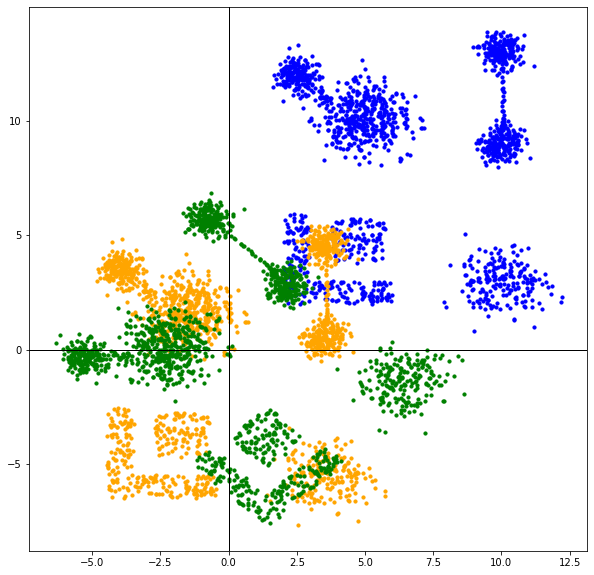

In [8]:
ax.scatter(rotated[0], rotated[1], s=10, color="green")
fig

In [9]:
rotated = rotated + means.values
rotated

,0,1
0,9.037880,2.124970
1,9.976876,3.138975
2,8.477166,1.772611
3,10.133281,3.528357
4,8.690252,2.910523
...,...,...
1540,13.638480,8.010354
1541,12.596727,7.017067
1542,12.036876,7.831392
1543,14.171794,6.917944


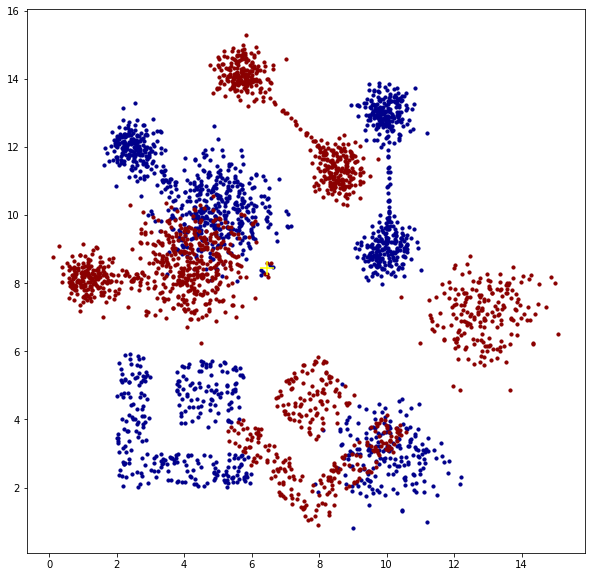

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(clust_data['x'], clust_data['y'], s=10, color='darkblue')
ax.scatter(rotated[0], rotated[1], s=10, color='darkred')
ax.scatter(means['x'], means['y'], marker='+', s=200, color='yellow')